# Discover NLP with Python: Session #1 - NLP Foundations

## EDA (Exploratory Data Analysis)

"Exploratory Data Analysis is the process of exploring data, generating insights, testing hypotheses, checking assumptions and revealing underlying hidden patterns in the data".

Through these goals, we can get a basic description of the data, visualize it, identify pattern in it, identify potential challenges of using the data, etc.

A website with a wealth of datasets is the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/index.php). One of these is the SMS Spam Collection Data Set, which is a public collection of SMS labeled messages that have been collected for mobile phone spam search. 

Note: refer to this website for more information on the dataset: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection. 





The dataset (zip file) can be downloaded from this URL -- https://archive.ics.uci.edu/ml/machine-learning-databases/00228/. 

Steps to access, download, and use the dataset:


1.   Access the above link, click on "smsspamcollection.zip" to download the dataset. 
2.   Once downloaded, click on the zipped folder to compress it.
3.   Save this folder to a location on your computer that you will remember, such as "Documents".
4.   Navigate to the file system in the pane to the left, and upload the dataset folder here. 
5.   We will next access this dataset to load it in and start EDA and pre-processing! It is located at: '/content/SMSSpamCollection'

Before we start exploring the data, we must first load in the data. You may be familiar with this, but the Pandas library actually makes this a simple task.

First, you import the Pandas package as pd. 

In [ ]:
import pandas as pd

And then, we use the read_csv() function for loading in the data. We pass into this function the URL in which the data can be found. To make it easier to work with the data in the future, we will name it by assigning it to a variable (digits in this case). 

Note: we use "header = None" here so that the first row of our data will not be interpreted as the column names of the data frame.

In [ ]:
sms = pd.read_table('/content/SMSSpamCollection', header=None)

In order to see what data we loaded in, we can simply do this below:

In [ ]:
print(sms)

         0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Describe the data

One of the most elementary steps to do this is by getting a basic description of your data. A basic description of your data is indeed a very broad term: you can interpret it as a quick and dirty way to get some information on your data, as a way of getting some simple, easy-to-understand information on your data, to get a basic feel for your data, etc

To begin, we can use the describe() function to obtain various summary statistics that exclude NaN values. We can refer back to our digits data and understand it a bit better.

In [ ]:
sms.describe()

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


You see that this function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data. Note that, of course, there are many packages available in Python that can give you those statistics, including Pandas itself. Using this function is just one of the ways to get this information. You can use these descriptive statistics to begin to assess the quality of your data. Then you’ll be able to decide whether you need to correct, discard or deal with the data in anohter way.

### Data Info

Here, we have a collection of text data known as a corpus. Specifically, there are 5,572 SMS messages written in English, serving as training examples. The first column is the target variable containing the class labels, which tells us if the message is spam or ham (aka not spam). The second column is the SMS message itself, stored as a string.

Since the target variable contains discrete values, this is a **classification** task. Let's start by placing the target variable in its own table and checking out how the two classes are distributed.

In [ ]:
y = sms[0]
y.value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

It looks like there are far fewer training examples for spam than ham—we'll take this imbalance into account in the analysis.

In addition, we need to encode the class labels in the target variable as numbers to ensure compatibility with some models in Scikit-learn. Because we have binary classes, let's use LabelEncoder and set 'spam' = 1 and 'ham' = 0.

LabelEncoder is a function of scikit learn's preprocessing capabilities, which helps to encode target labsls with values between 0 and the (# of classes) - 1. 

Note: Refer to this website for more information (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

In [ ]:
y_enc

array([0, 0, 1, ..., 0, 0, 0])

Next, we place the SMS message data into its own table. We must convert this corpus into useful numerical features so we can train this classifier and this is where NLP works its magic!

In [ ]:
raw_text = sms[1]

In [ ]:
raw_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: 1, Length: 5572, dtype: object

Another important part of any dataset is missing values. When this happens, the dataset can lose expressiveness, which may lead to weak or at times biased analyses. Practically, this means that when you’re missing values for certain features, the chances of your classification or predictions for the data being off only increase.

To identify the rows that contain missing values, you can use isnull(). In the result that you’ll get back, you’ll see True or False appearing in each cell: True will indicate that the value contained within the cell is a missing value, False means that the cell contains a ‘normal’ value.

In [ ]:
pd.isnull(sms)

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In this case, you see that the data is quite complete: there are no missing values and you're lucky! But this is definitely not always the case for datasets out there.

### Basic Visualization

Data visualization can help with identifying patterns in the data. The Python libraries Seaborn and Matplotlib are easy and quick ways to do this. 

In [ ]:
import matplotlib as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


There are a couple basic visualizations we can do. The first is displaying the length of all the dataset instances. To do this, we must first label the columns with their appropriate titles and add a column to the dataset that contains the length. 

In [ ]:
sms.columns=['label', 'msg']

In [ ]:
sms.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms["length"] = sms["msg"].apply(len)

In [ ]:
sms.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


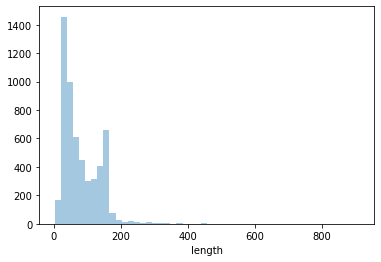

In [ ]:
sns.distplot(sms["length"], kde=False)

References:
- https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
- https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
- https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a



---



---



## Pre-Processing

There are many feature engineering strategies for transforming text data into features. Some involve assigning each unique word-like term to a feature and counting the number of occurrences per training example. However, if we were to perform this strategy right now, we'd end up with an absurd number of features, a result of the myriad possible terms. The classifier would take too long to train and likely overfit. As a result, each NLP problem requires a tailored approach to determine which terms are relevant and meaningful, and this is where we begin our pre-processing.

### Step 1: Contraction Mapping / Expanding Contractions

Contractions are words that we write with an apostrophe. Examples of contractions are words like “ain’t” or “aren’t”. Since we want to standardize our text, it makes sense to expand these contractions. We are going to add a new column to our dataframe called “no_contract” and apply a lambda function to the "msg" field which will expand any contractions.

First, we install and import the necessary library - contractions.

In [ ]:
!pip install contractions
import contractions

In [ ]:
sms['no_contract'] = sms['msg'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [ ]:
sms.head()

,label,msg,length,no_contract
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he..."


Also, we would want the expanded contractions to be tokenized separately, therefore we convert the lists under the "no_contract" column back into strings.

In [ ]:
sms["msg_str"] = [' '.join(map(str, l)) for l in sms['no_contract']]

In [ ]:
sms.head()

,label,msg,length,no_contract,msg_str
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar..."


Reference: https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

### Step 2: Tokenization


In this step, we construct the features. We will begin by breaking apart the corpus into a vocabulary of unique terms, and this is called tokanization. 

We can tokenize individual terms and generate what's called a bag of words model. You may notice this model has a glaring pitfall: it fails to capture the innate structure of human language. We can also tokenize using nltk, which is the leading platform for building Python programs to work with human language data. 

We will begin my installing and importing nltk, so we can use it!

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First, we will take a basic sentence to demonstrate this tokenization. 

In [ ]:
text = "Hi, I would like to tokenize this sentence."

In [ ]:
print(word_tokenize(text))

['Hi', ',', 'I', 'would', 'like', 'to', 'tokenize', 'this', 'sentence', '.']


Now, we can apply the tokenizer to our dataset. We will apply NLTK.word_tokenize() function to the “msg_str” column and create a new column named “tokenized”.

In [ ]:
sms['tokenized'] = sms['msg_str'].apply(word_tokenize)
sms.head()

,label,msg,length,no_contract,msg_str,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,..."


Reference: https://www.guru99.com/tokenize-words-sentences-nltk.html

### Step 3: Noise Cleaning - spacing, special characters, lowercasing


Let'a take a small step back and examine a few random examples of SMS messages from our dataset. 

In [ ]:
sms.sample(frac=0.05)

,label,msg,length,no_contract,msg_str,tokenized
3421,spam,"As a valued customer, I am pleased to advise y...",152,"[As, a, valued, customer,, I, am, pleased, to,...","As a valued customer, I am pleased to advise y...","[As, a, valued, customer, ,, I, am, pleased, t..."
3595,spam,Do you want a New Nokia 3510i Colour Phone Del...,157,"[Do, you, want, a, New, Nokia, 3510i, Colour, ...",Do you want a New Nokia 3510i Colour Phone Del...,"[Do, you, want, a, New, Nokia, 3510i, Colour, ..."
3121,ham,Good evening! this is roger. How are you?,41,"[Good, evening!, this, is, roger., How, are, y...",Good evening! this is roger. How are you?,"[Good, evening, !, this, is, roger, ., How, ar..."
2926,ham,Are you coming to day for class.,32,"[Are, you, coming, to, day, for, class.]",Are you coming to day for class.,"[Are, you, coming, to, day, for, class, .]"
4261,ham,Are you plans with your family set in stone ?,45,"[Are, you, plans, with, your, family, set, in,...",Are you plans with your family set in stone ?,"[Are, you, plans, with, your, family, set, in,..."
...,...,...,...,...,...,...
3369,ham,"Hey elaine, is today's meeting still on?",40,"[Hey, elaine,, is, today's, meeting, still, on?]","Hey elaine, is today's meeting still on?","[Hey, elaine, ,, is, today, 's, meeting, still..."
1595,ham,Never blame a day in ur life. Good days give u...,152,"[Never, blame, a, day, in, ur, life., Good, da...",Never blame a day in ur life. Good days give y...,"[Never, blame, a, day, in, ur, life, ., Good, ..."
3523,ham,Im sorry bout last nite it wasnt ur fault it ...,114,"[I am, sorry, bout, last, nite, it, wasnt, ur...",I am sorry bout last nite it wasnt ur fault i...,"[I, am, sorry, bout, last, nite, it, wasnt, u..."
3143,ham,Not planned yet :)going to join company on jan...,91,"[Not, planned, yet, :)going, to, join, company...",Not planned yet :)going to join company on jan...,"[Not, planned, yet, :, ), going, to, join, com..."


Clearly there's a lot going on here: digits, gratuitous whitespace, and all varieties of punctuation. Some terms are randomly capitalized, others are in all-caps. Since these terms might show up in any one of the training examples in countless forms, we need a way to ensure each training example is on equal footing via a preprocessing step called normalization. This form of noise cleaning takes care of spacing and any special characters. 

Transforming all words to lowercase is also a very common pre-processing step. In this case, we will once again append a new column named “lower” to the dataframe which will transform all the tokenized words into lowercase. However, because we have to iterate over multiple words we will use a simple for-loop within a lambda function to apply the “lower” function to each word.

In [ ]:
sms['lower'] = sms['tokenized'].apply(lambda x: [word.lower() for word in x])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,..."


Next, we'll remove all punctuation since they serve little value once we begin to analyze our data. Continuing the previous pattern, we will create a new column which has the punctuation removed. We will again utilize a for-loop within a lambda function to iterate over the tokens but this time using an IF condition to only output alpha characters.

In [ ]:
import string
punc = string.punctuation
sms['no_punc'] = sms['lower'].apply(lambda x: [word for word in x if word not in punc])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he..."


 ### Step 4: Spell Checking

For spell checking, we will use Microsoft's TextBlob, which is a simple spelling correction mechanism. You can install this using the command below:

In [ ]:
!pip install pyspellchecker

We will first demonstrate a simple example how we implement this spellchecker and how it is able to not only identify misspelled words, but also suggest the most likely corrected spelling along with other likely options.

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'happening', 'penning', 'henning'}


Reference: https://pypi.org/project/pyspellchecker/

### Step 6: ‘Stop Words’ Identification

Some words in the English language, while necessary, don't contribute much to the meaning of a phrase. These words, such as "when", "had", "those" or "before", are called stop words and should be filtered out.

First, we need to import the NLTK stopwords library and set our stopwords to “english”. 

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We are going to add a new column “no_stopwords” which will remove the stopwords from the “no_punc” column since it has been tokenized, had been converted to lowercase and punctuation was removed. Once again a for-loop within a lambda function will iterate over the tokens in “no_punc” and only return the tokens which do not exist in our “stop_words” variable.

In [ ]:
sms['stopwords_removed'] = sms['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]"


### Step 6: Stemming/Lemmatization

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.

Instead of taking the easy way out with stemming, let’s apply lemmatization to our data but it requires some additional steps compared to stemming. First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
sms['pos_tags'] = sms['no_contract'].apply(nltk.tag.pos_tag)
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,...","[(Go, NNP), (until, IN), (jurong, JJ), (point,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ..."


We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion.

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
sms['wordnet_pos'] = sms['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,...","[(Go, NNP), (until, IN), (jurong, JJ), (point,...","[(Go, n), (until, n), (jurong, a), (point,, n)..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif...","[(Ok, n), (lar..., v), (Joking, n), (wif, n), ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...","[(Free, a), (entry, n), (in, n), (2, n), (a, n..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ...","[(you, n), (dun, v), (say, v), (so, r), (early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ...","[(Nah, n), (I, n), (do not, v), (think, v), (h..."


Now we can apply NLTK’s word lemmatizer within our trusty list comprehension. Notice, the lemmatizer function requires two parameters the word and its tag (in wordnet form).

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wnl = WordNetLemmatizer()
sms['lemmatized'] = sms['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,...","[(Go, NNP), (until, IN), (jurong, JJ), (point,...","[(Go, n), (until, n), (jurong, a), (point,, n)...","[Go, until, jurong, point,, crazy.., Available..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif...","[(Ok, n), (lar..., v), (Joking, n), (wif, n), ...","[Ok, lar..., Joking, wif, you, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...","[(Free, a), (entry, n), (in, n), (2, n), (a, n...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ...","[(you, n), (dun, v), (say, v), (so, r), (early...","[you, dun, say, so, early, hor..., you, c, alr..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ...","[(Nah, n), (I, n), (do not, v), (think, v), (h...","[Nah, I, do not, think, he, go, to, usf,, he, ..."


Lastly, we should save all of our pre-processing work for the next steps in the workflow. We can simnple save it as a csv file.

In [ ]:
sms.to_csv('sms_spam_collection.csv')

References:
- https://github.com/ujjwalgupta07/spam_ham_detection/blob/master/spam_ham_classification.ipynb
- https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
- https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
- https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/#d-removing-contractions

***
- https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/
- https://inmachineswetrust.com/posts/sms-spam-filter/
- https://realpython.com/natural-language-processing-spacy-python/
- https://github.com/WomenWhoCode/WWCodeDataScience/blob/master/Intro_to_MachineLearning/1_Introduction.ipynb



---



---

